In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv("../../data/captone_data.csv")
print("Dataset shape:", df.shape)
df.head(30)

Dataset shape: (233306, 3)


,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
5,1390655,ST0101EN,3.0
6,367075,DS0301EN,3.0
7,1858700,CC0101EN,3.0
8,600100,BD0211EN,3.0
9,623377,DS0105EN,3.0


In [4]:
print(df['rating'].unique())
print('So luong rating 3. la: ', df['rating'].value_counts().get(3.0, 0))
print('So luong rating 2. la: ', df['rating'].value_counts().get(2.0, 0))

[3. 2.]
So luong rating 3. la:  222330
So luong rating 2. la:  10976


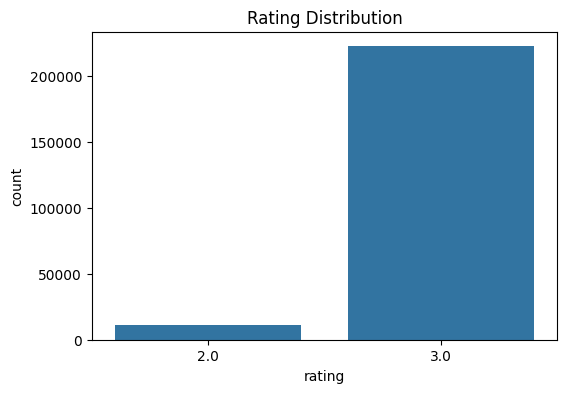

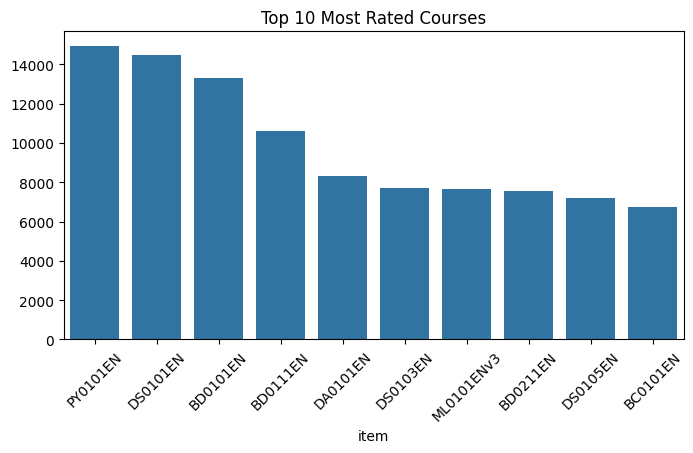

In [5]:
# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.show()

# Top 10 rated items
top_items = df['item'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title("Top 10 Most Rated Courses")
plt.xticks(rotation=45)
plt.show()


In [6]:
count = 0
item_list = []
for item in df['item'].unique():
    if df['item'].value_counts().get(item) == 1:
        count += 1
        item_list.append(item)
    print('So luong cua ', item, ' la: ', df['item'].value_counts().get(item))

print(f'Co {count} item xuat hien 1 lan')
for item in item_list:
    print(item)

So luong cua  CC0101EN  la:  4983
So luong cua  CL0101EN  la:  3000
So luong cua  ML0120ENv3  la:  305
So luong cua  BD0211EN  la:  7551
So luong cua  DS0101EN  la:  14477
So luong cua  ST0101EN  la:  5015
So luong cua  DS0301EN  la:  3624
So luong cua  DS0105EN  la:  7199
So luong cua  BD0141EN  la:  3044
So luong cua  CO0201EN  la:  2896
So luong cua  CB0103EN  la:  5512
So luong cua  DV0101EN  la:  6709
So luong cua  DS0103EN  la:  7719
So luong cua  BD0123EN  la:  1347
So luong cua  BC0101EN  la:  6719
So luong cua  TA0105EN  la:  1067
So luong cua  ML0151EN  la:  2180
So luong cua  BD0101EN  la:  13291
So luong cua  BD0111EN  la:  10599
So luong cua  BC0201EN  la:  2866
So luong cua  ML0122ENv1  la:  1602
So luong cua  BD0131EN  la:  2873
So luong cua  BD0121EN  la:  1608
So luong cua  PY0101EN  la:  14936
So luong cua  BD0145EN  la:  1015
So luong cua  ML0101EN  la:  1750
So luong cua  CO0301EN  la:  2247
So luong cua  ML0101ENv3  la:  7644
So luong cua  DB0151EN  la:  1559
So lu

In [12]:
user_item_matrix = df.pivot_table(index='user', columns='item', values='rating')
user_item_matrix.fillna(0, inplace=True)

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_matrix = train_df.pivot(index='user', columns='item', values='rating').fillna(0)

In [13]:
item_user_matrix = train_matrix.T
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model_knn.fit(item_user_matrix.values)

sample_test = test_df.sample(n=3000, random_state=42)
display(item_user_matrix)

user,2,4,5,7,8,9,12,16,17,19,...,2101262,2101370,2101535,2101601,2101673,2102054,2102356,2102680,2102983,2103039
item,,,,,,,,,,,,,,,,,,,,,
AI0111EN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0101EN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0201EN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0202EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
BD0101EN,3.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMP0105EN,2.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMP0106,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TMP107,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
k_values = [6, 7, 8, 10, 12]
knn_rmse = []
knn_f1 = []

for k in k_values:
    preds, truths = [], []
    bin_preds, bin_truths = [], []

    for row in sample_test.itertuples():
        user, item, rating = row.user, row.item, row.rating
        
        if item not in item_user_matrix.index or user not in train_matrix.index:
            continue
        
        item_idx = item_user_matrix.index.get_loc(item)
        distances, indices = model_knn.kneighbors([item_user_matrix.iloc[item_idx]], n_neighbors=k + 1)
        neighbors = item_user_matrix.index[indices[0][1:]]
        
        user_ratings = train_matrix.loc[user]
        neighbor_ratings = user_ratings[neighbors]
        neighbor_ratings = neighbor_ratings[neighbor_ratings > 0]
        
        if len(neighbor_ratings) > 0:
            pred = neighbor_ratings.mean()
        else:
            pred = user_ratings[user_ratings > 0].mean() if user_ratings[user_ratings > 0].any() else 3.0
        
        preds.append(pred)
        truths.append(rating)

        # Label cho f1-score
        bin_preds.append(int(pred == 3.0))
        bin_truths.append(int(rating >= 2.5))

    rmse = np.sqrt(mean_squared_error(truths, preds))
    f1 = f1_score(bin_truths, bin_preds, zero_division=1)
    knn_rmse.append(rmse)
    knn_f1.append(f1)

    print(f"K = {k}, RMSE = {rmse}, F1-score = {f1}")

K = 6, RMSE = 0.06209876457517563, F1-score = 0.9954305799648507
K = 7, RMSE = 0.06098407446102726, F1-score = 0.995605554579012
K = 8, RMSE = 0.0605644216426017, F1-score = 0.9966637401229148
K = 10, RMSE = 0.06019950322123587, F1-score = 0.9963112594414193
K = 12, RMSE = 0.05948300272640692, F1-score = 0.9959585310138815


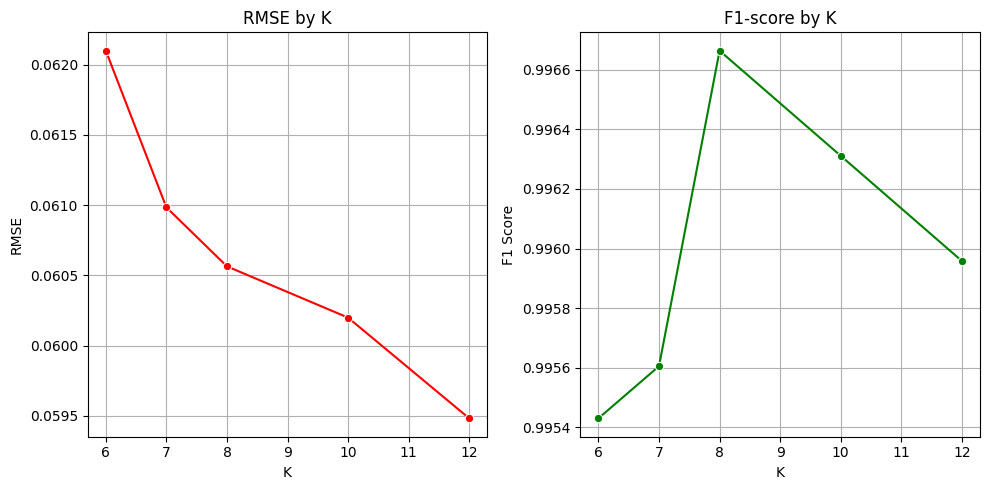

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=k_values, y=knn_rmse, marker='o', color='red')
plt.title("RMSE by K")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(x=k_values, y=knn_f1, marker='o', color='green')
plt.title("F1-score by K")
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.grid(True)

plt.tight_layout()
plt.show()